In [111]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [112]:
data = pd.read_csv('UKM2018.csv')

In [113]:
data.head(3)

,No Kontrak,Cabang,Area,Regional,Nama Debitur,Tenor,Status Perkawinan,Kota,Kode Pos,Alamat Debitur,...,Aging Pastdue,Keterangan Past Due,OSP,Pendidikan Debitur,Jenis Kelamin,Keterangan Bisnis Checking,Bagi Hasil,Penggunaan Dana Investasi,Angsuran Tempat lain,Status Kontrak
0,005.0116.0005,CIKUPA,AREA 1D - BANTEN,REGIONAL 1 - JBB,DEDE IMAN SUHERMAN,6,MARRIED,TANGERANG,15132,KP GEBANG,...,970,> 181 HARI,"5,285,780",SMA,LAKI-LAKI,YA,1911000,MENAMBAH MODAL USAHA,NO,WO
1,005.0116.0032,CIKUPA,AREA 1D - BANTEN,REGIONAL 1 - JBB,ASMUNAH,18,MARRIED,TANGERANG,15710,KP CIBADAK,...,1050,> 181 HARI,"10,300,610",SMA,PEREMPUAN,YA,798000,MENAMBAH MODAL USAHA,NO,WO
2,005.0116.0034,CIKUPA,AREA 1D - BANTEN,REGIONAL 1 - JBB,SAPIUN,18,MARRIED,TANGERANG,15550,KP PABUARAN,...,773,> 181 HARI,"3,184,692",SD,LAKI-LAKI,YA,424000,MEMULAI USAHA BARU,NO,WO


In [114]:
data.tail(3)

,No Kontrak,Cabang,Area,Regional,Nama Debitur,Tenor,Status Perkawinan,Kota,Kode Pos,Alamat Debitur,...,Aging Pastdue,Keterangan Past Due,OSP,Pendidikan Debitur,Jenis Kelamin,Keterangan Bisnis Checking,Bagi Hasil,Penggunaan Dana Investasi,Angsuran Tempat lain,Status Kontrak
18147,110.1218.0020,MAKASSAR 2,AREA 5A - MAKASAR,REGIONAL 5 - SULSELTRA,ANDHIKA FAJAR,6,MARRIED,MAKASSAR,90224,ABDUL KADIR II NO 51,...,0,CURRENT,"3,354,340",SMP,PEREMPUAN,YA,747000,MENAMBAH MODAL USAHA,NO,LIVE
18148,110.1218.0021,MAKASSAR 2,AREA 5A - MAKASAR,REGIONAL 5 - SULSELTRA,ANDINI SOPHYAN ANDI NIPPI,6,SINGLE,MAKASSAR,90225,BONTO KAPETTA,...,0,CURRENT,"10,164,668",SD,PEREMPUAN,YA,2050000,MEMULAI USAHA BARU,NO,LIVE
18149,110.1218.0047,MAKASSAR 2,AREA 5A - MAKASAR,REGIONAL 5 - SULSELTRA,MUHAMMAD RIJAL,12,SINGLE,GOWA,92111,PALLANTIKANG LORONG 1 BLOK A,...,0,CURRENT,"5,477,470",SMA,LAKI-LAKI,YA,638000,MEMULAI USAHA BARU,NO,LIVE


In [115]:
data.drop(['No Kontrak','Kode Pos', 'Kode Pos.1', 'Nama Debitur', 'Alamat Debitur'], axis=1, inplace=True)

In [116]:
data['Lama Tinggal'] = data['Lama Tinggal'].str.extract('(\d+) ,0 Tahun')

In [117]:
data['Lama Usaha'] = data['Lama Usaha'].apply(lambda x: int(x.split(',')[0])*12 + int(x.split(',')[1]))

In [118]:
data.corr()

,Tenor,Nilai OTR,Nilai Funding,Lama Usaha,Aging Pastdue,Bagi Hasil
Tenor,1.000000,0.049176,0.118298,0.026737,0.035109,-0.410534
Nilai OTR,0.049176,1.000000,0.727663,0.083331,-0.026020,0.608499
Nilai Funding,0.118298,0.727663,1.000000,0.086905,-0.024300,0.806102
Lama Usaha,0.026737,0.083331,0.086905,1.000000,0.011715,0.054776
Aging Pastdue,0.035109,-0.026020,-0.024300,0.011715,1.000000,-0.040898
Bagi Hasil,-0.410534,0.608499,0.806102,0.054776,-0.040898,1.000000


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18150 entries, 0 to 18149
Data columns (total 26 columns):
Cabang                        18150 non-null object
Area                          18150 non-null object
Regional                      18150 non-null object
Tenor                         18150 non-null int64
Status Perkawinan             18150 non-null object
Kota                          18150 non-null object
Status Rumah                  18150 non-null object
Lama Tinggal                  16060 non-null object
Nilai OTR                     18149 non-null float64
Nilai Funding                 18150 non-null int64
Referensi                     18150 non-null object
Bentuk Usaha                  18150 non-null object
Lama Usaha                    18150 non-null int64
Kota.1                        18150 non-null object
Alamat Tempat Usaha           18150 non-null object
Nama Surveyor                 18139 non-null object
Aging Pastdue                 18150 non-null int64
Keterangan

In [120]:
data.isna().sum()

Cabang                           0
Area                             0
Regional                         0
Tenor                            0
Status Perkawinan                0
Kota                             0
Status Rumah                     0
Lama Tinggal                  2090
Nilai OTR                        1
Nilai Funding                    0
Referensi                        0
Bentuk Usaha                     0
Lama Usaha                       0
Kota.1                           0
Alamat Tempat Usaha              0
Nama Surveyor                   11
Aging Pastdue                    0
Keterangan Past Due              0
OSP                              0
Pendidikan Debitur               3
Jenis Kelamin                    3
Keterangan Bisnis Checking       0
Bagi Hasil                       0
Penggunaan Dana Investasi        0
Angsuran Tempat lain             0
Status Kontrak                   0
dtype: int64

In [121]:
data = data.dropna()

In [122]:
print('Number of rows in the dataset:', data.shape[0])
print('Number of columns in the dataset:', data.shape[1])

Number of rows in the dataset: 16046
Number of columns in the dataset: 26


In [123]:
data.describe()

,Tenor,Nilai OTR,Nilai Funding,Lama Usaha,Aging Pastdue,Bagi Hasil
count,16046.000000,1.604600e+04,1.604600e+04,16046.000000,16046.000000,1.604600e+04
mean,15.297146,1.101927e+07,6.803830e+06,56.604637,27.875608,7.175118e+05
std,3.362888,6.389217e+06,2.699997e+06,69.740754,120.530855,2.919552e+05
min,6.000000,0.000000e+00,1.500000e+06,0.000000,0.000000,1.770000e+05
25%,12.000000,8.250000e+06,5.000000e+06,1.000000,0.000000,5.370000e+05
50%,18.000000,1.005000e+07,6.500000e+06,36.000000,0.000000,6.550000e+05
75%,18.000000,1.195000e+07,8.000000e+06,72.000000,0.000000,8.300000e+05
max,26.000000,1.500000e+08,3.000000e+07,720.000000,1216.000000,5.212000e+06


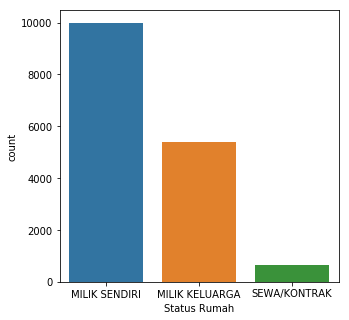

In [124]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Status Rumah', data=data)
plt.show()

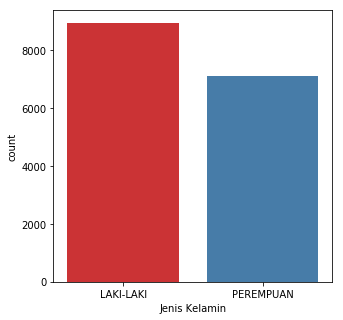

In [125]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Jenis Kelamin', data=data, palette="Set1")
plt.show()

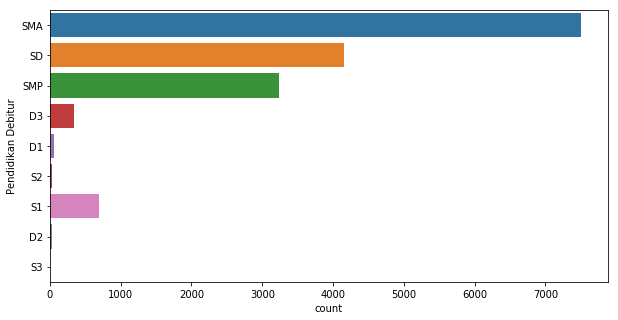

In [126]:
fig = plt.figure(figsize=(10,5))
sns.countplot (y='Pendidikan Debitur', data=data)
plt.show()

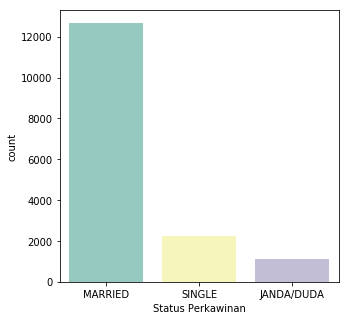

In [127]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Status Perkawinan', data=data, palette="Set3")
plt.show()

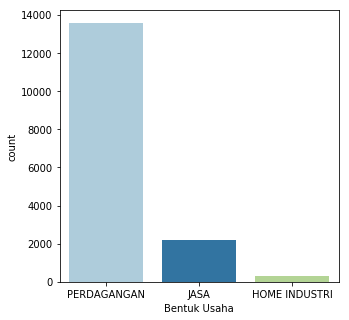

In [128]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Bentuk Usaha', data=data, palette="Paired")
plt.show()

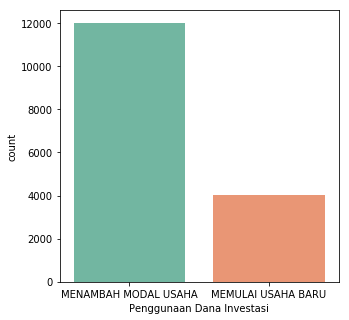

In [129]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Penggunaan Dana Investasi', data=data, palette="Set2")
plt.show()

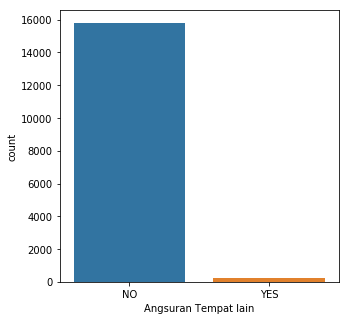

In [130]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Angsuran Tempat lain', data=data)
plt.show()

In [131]:
data['Referensi'].value_counts()

MITRA                6037
AGEN                 4677
RO                   2813
DERET CACAH          1489
MEMBER GET MEMBER     786
BROSUR                134
WALK-IN                77
TEMAN/TETANGGA         21
SAUDARA/KELUARGA       12
Name: Referensi, dtype: int64

In [132]:
data_num = data.copy()

In [133]:
data_num.fillna({'Nama Kelompok': 'Unknown', 'Lama Tinggal': 0}, inplace=True)

In [134]:
data_num['Lama Tinggal'] = data_num['Lama Tinggal'].astype(int)

In [135]:
#data_num['Kode Pos'] = data_num['Kode Pos'].replace('-', 0)
#data_num['Kode Pos'] = data_num['Kode Pos'].astype(int)

In [136]:
data_num.loc[:, data_num.dtypes == 'object'] = data_num.loc[:, data_num.dtypes == 'object'].apply(lambda x:LabelEncoder().fit_transform(x), axis=0)

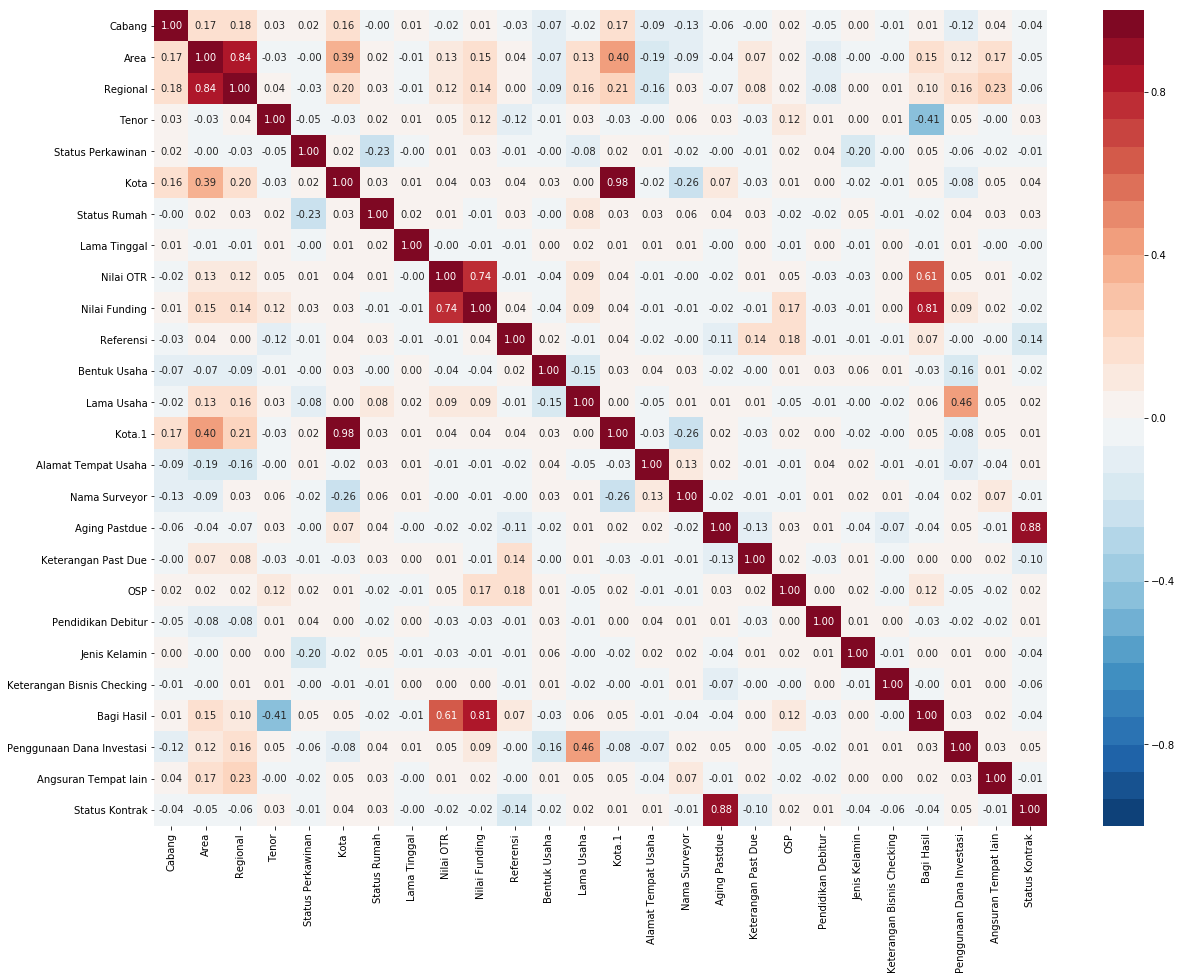

In [137]:
datacorr = data_num.corr()
plt.figure(figsize=(20,15))
sns.heatmap(datacorr, vmin=-1, vmax=1, cmap=sns.color_palette("RdBu_r", 30), annot=True, fmt='.2f')

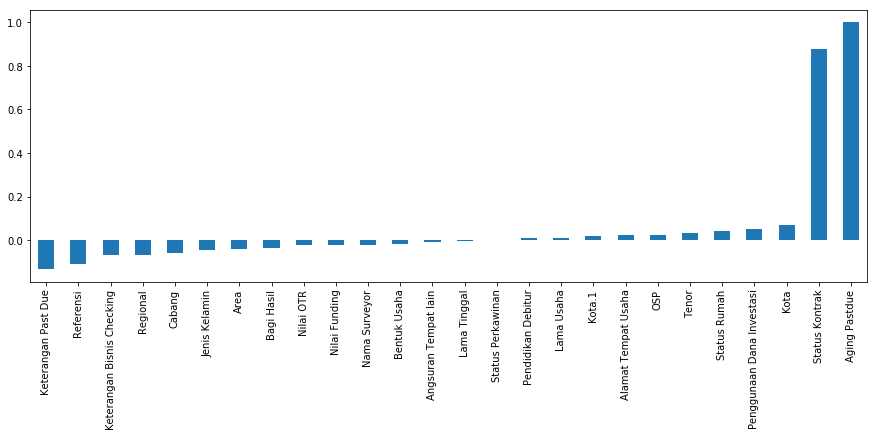

In [138]:
datacorr['Aging Pastdue'].sort_values().plot(kind='bar', figsize=(15,5))

In [139]:
X = data_num.drop(columns='Aging Pastdue')
y = data_num['Aging Pastdue']

#### Random Forest

In [140]:
rf = RandomForestRegressor(n_estimators=30, max_depth=8)
kf = KFold(n_splits=5, random_state=123)
rf_pred = cross_val_predict(rf, X, y, cv=kf)
print('R2:', r2_score(y, rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(y, rf_pred)))

R2: 0.8038474769646377
RMSE: 53.38037902048012


Text(0, 0.5, 'Predicted')

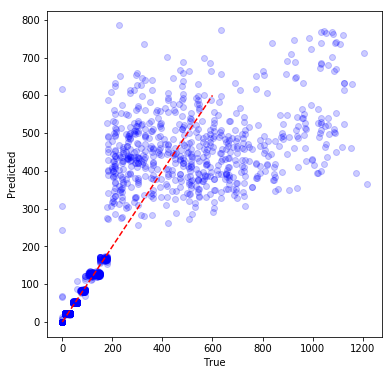

In [141]:
plt.figure(figsize=(6,6))
plt.plot(y, rf_pred, 'bo', alpha=0.2)
plt.plot([0, 600], [0, 600], 'r--')
plt.xlabel('True')
plt.ylabel('Predicted')

#### Gradient Boosting

In [142]:
gb = GradientBoostingRegressor(n_estimators=10, max_depth=8)
kf = KFold(n_splits=5, random_state=123)
gb_pred = cross_val_predict(gb, X, y, cv=kf)
print('R2:', r2_score(y, gb_pred))
print('RMSE:', np.sqrt(mean_squared_error(y, gb_pred)))

R2: 0.65520955461403
RMSE: 70.77213788850875


Text(0, 0.5, 'Predicted')

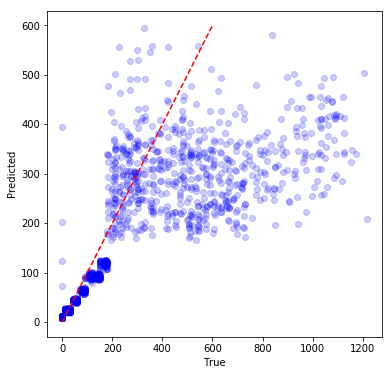

In [143]:
plt.figure(figsize=(6,6))
plt.plot(y, gb_pred, 'bo', alpha=0.2)
plt.plot([0, 600], [0, 600], 'r--')
plt.xlabel('True')
plt.ylabel('Predicted')

In [144]:
lr = LinearRegression()
kf = KFold(n_splits=5, random_state=123)
lr_pred = cross_val_predict(lr, X, y, cv=kf)
print('R2:', r2_score(y, lr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y, lr_pred)))

R2: 0.7219357900285661
RMSE: 63.55610160945063


In [145]:
br = BayesianRidge()
kf = KFold (n_splits=5, random_state=123)
br_pred = cross_val_predict(br, X, y, cv=kf)
print('R2:', r2_score(y, br_pred))
print('RMSE:', np.sqrt(mean_squared_error(y, br_pred)))

R2: 0.7219851992848316
RMSE: 63.550454713680345
